In [5]:
%pylab inline
import numpy as np
import pychirpz

Populating the interactive namespace from numpy and matplotlib


In [6]:
def dtft(x, omegas):
    """
    evaluate the DTFT at the indicated points omega for the signal x
    
    x is assumed to run from [-n/2, n/2-1]
    """
    N = len(x)
    ns = np.arange(N)
    W = np.zeros((len(omegas), N), dtype=np.complex128)
    for wi, w in enumerate(omegas):
        W[wi, :] = np.exp(-1.0j * w * ns)
        
    return np.dot(W, x)

N = 256
x = np.zeros(N)
width = 8
x[N/2-width:N/2+width] = 1.0
omegas = np.linspace(0, 2*np.pi, 1000)
X_dtft = dtft(x, omegas)
    

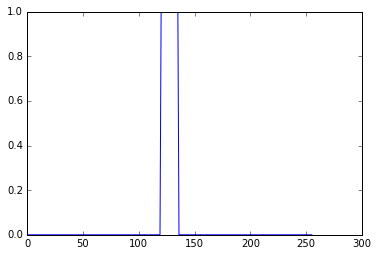

In [7]:
pylab.plot(x)

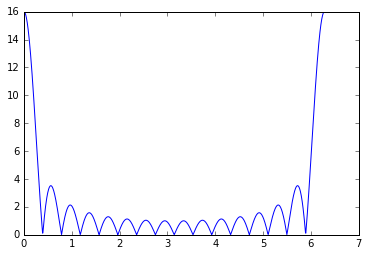

In [8]:
pylab.plot(omegas, np.abs(X_dtft))

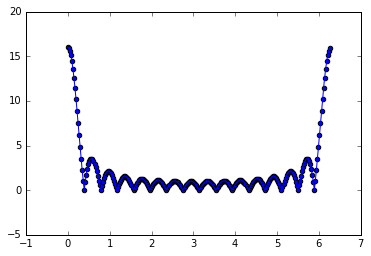

In [9]:
FFT_N = len(x)
X_fft = np.fft.fft(x)
fft_omegas = np.arange(FFT_N, dtype=float)/FFT_N * 2 * np.pi
pylab.scatter(fft_omegas, np.abs(X_fft))
pylab.plot(omegas, np.abs(X_dtft))


(0, 0.7)

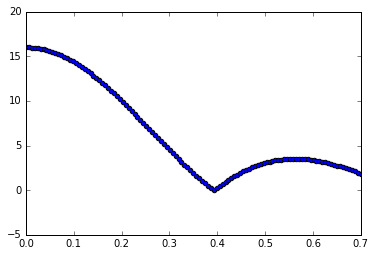

In [10]:
def nextpow2(n):
    """
    Return the smallest power of two greater than or equal to n.
    """
    return int(math.ceil(math.log(n)/math.log(2)))

# now try ourselves a chirp-z transform
def chirpz(x, M, A, W):
    """
    chirp z transform per Rabiner derivation pp1256
    x is our (complex) signal of length N
    

    
    """
    N = len(x)
    L = 2**(nextpow2(N + M -1))  # or nearest power of two
    yn = np.zeros(L, dtype=np.complex128)
    for n in range(N):
        yn[n] = x[n] * A**(-n) * W**((n**2.0)/2.0)
    Yr = np.fft.fft(yn)
    
    vn = np.zeros(L, dtype=complex128)
    for n in range(M-1):
        vn[n] = W**((-n**2.0)/2.0)
        
    for n in range(L-N+1, L):
        vn[n] = W**(-((L-n)**2.0)/2.0)
        
    Vr = np.fft.fft(vn)
    
    Gr = Yr * Vr
    
    gk = np.fft.ifft(Gr)
    #gk = np.convolve(yn, vn)
    
    Xk = np.zeros(M, dtype=np.complex128)
    for k in range(M):
        Xk[k] = W**((k**2.0)/2.0) * gk[k]
        
    return Xk

    
FFT_N = 1024

M = 130
phi_0 = 1.0/1024.0
W = np.exp(-1.0j * 2.0*np.pi * phi_0)
freq_points = np.arange(M) * phi_0 * np.pi * 2
A = 1.0
test = chirpz(x, M, A, W)
pylab.scatter(freq_points, np.abs(test))
pylab.plot(omegas, np.abs(X_dtft))
pylab.xlim(0, 0.7)

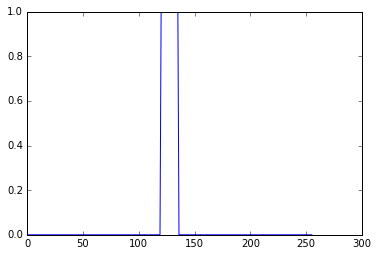

In [11]:
pylab.plot(x)

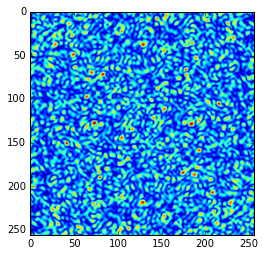

In [12]:
# 2d attempts
N = 256
c = 40
x2d = np.zeros((N, N))
width = 30
x2d[c-width:c+width, c-width:c+width] = np.random.normal(0, 1, (width*2, width*2))

X2d = np.fft.fft2(x2d)
pylab.imshow(np.abs(X2d))

In [13]:
M = 256
phi_0 = 1.0/N
W = np.exp(-1.0j * 2.0*np.pi * phi_0)

A = np.exp(-1j * 0 )

out = np.zeros((N, M), dtype=np.complex128)
for i in range(N):
    out[i] = chirpz(x2d[i], M, A, W)
    
out2d = np.zeros((M, M), dtype=np.complex128)
print out.shape
for i in range(M):
    out2d[i] = chirpz(out[:, i], M, A, W)
    

(256, 256)


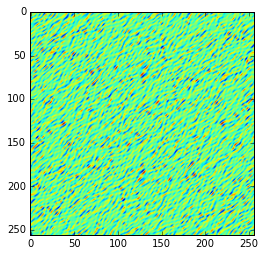

In [14]:

pylab.figure()
pylab.imshow(np.real(out2d))

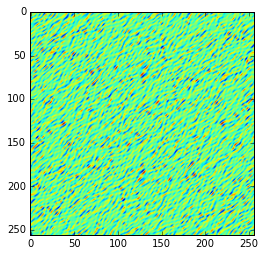

In [15]:

pylab.figure()
pylab.imshow(np.real(X2d[:M, :M]).T)

(0, 40)

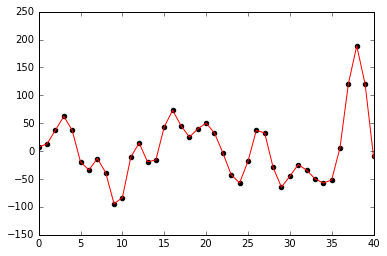

In [16]:
pylab.plot(np.real(out2d[128]), c='r')
pylab.scatter(range(M), np.real(X2d[:, 128]), c='k')
pylab.xlim(0, 40)

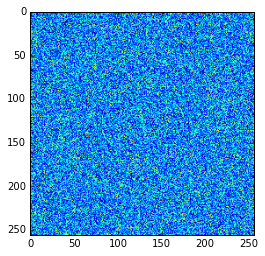

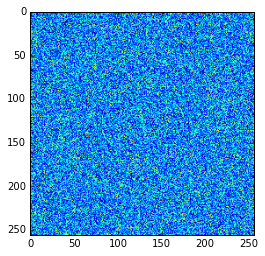

In [41]:
# now try ourselves a chirp-z transform
import pychirpz
reload(pychirpz)
def chirpz2d(x, M, A, W):
    """
    chirp z transform per Rabiner derivation pp1256
    x is our (complex) signal of length N
    assume x is square, output M will be square, dims are the same on all sides
    
    
    """
    N = len(x)
    L = 2**(nextpow2(N + M -1))  # or nearest power of two
    yn = np.zeros((L, L), dtype=np.complex128)
    ns = np.arange(N)
    ms = np.arange(M)
    
    yn_scale =  A**(-ns) * W**((ns**2.0)/2.0)
        
    yn[:N, :N] = x * np.outer(yn_scale, yn_scale)

    Yr = np.fft.fft2(yn)
    
    vn = np.zeros(L, dtype=np.complex128)
    for n in range(M-1):
        vn[n] = W**((-n**2.0)/2.0)
        
    for n in range(L-N+1, L):
        vn[n] = W**(-((L-n)**2.0)/2.0)
        
    Vr = np.fft.fft2(np.outer(vn, vn))
    
    Gr = Yr * Vr
    
    gk = np.fft.ifft2(Gr)
    
   
    Xk = W**((ms**2.0)/2.0) 
        
    return gk[:M, :M] * np.outer(Xk, Xk)

# 2d attempts
N = 256
c = 128
x2d = np.random.normal(0, 1, (N, N))
width = 120
#x2d[c-width:c+width, c-width:c+width] = np.random.normal(0, 1, (width*2, width*2))

X2d = np.fft.fft2(x2d)
pylab.imshow(np.abs(X2d))


out2d = pychirpz.fchirpz2d(x2d, M, A, W)
pylab.figure()
pylab.imshow(np.abs(out2d))


(0, 200)

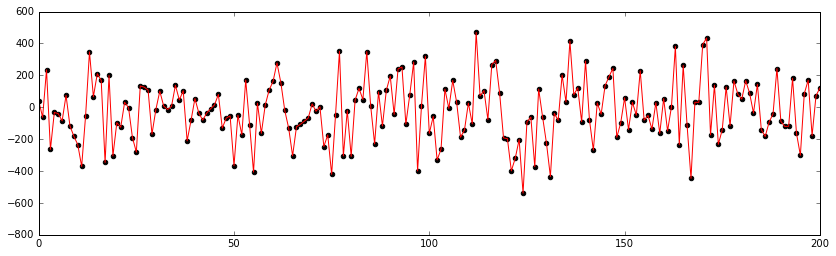

In [42]:
fig = pylab.figure(figsize=(14, 4))
pylab.plot(np.real(out2d[254]), c='r')
pylab.scatter(range(M), np.real(X2d[254]), c='k')
pylab.xlim(0, 200)

(0, 200)

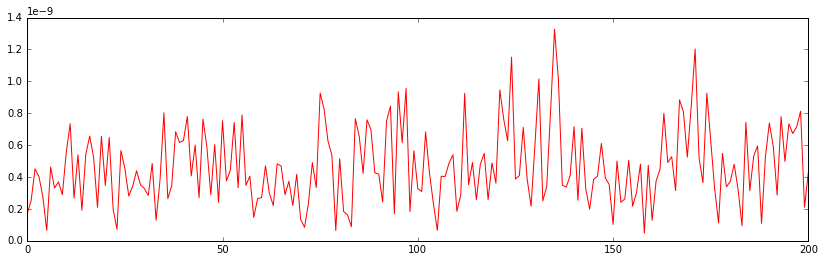

In [43]:
delta = np.abs(X2d - out2d)
fig = pylab.figure(figsize=(14, 4))
pylab.plot(np.real(delta[254]), c='r')
pylab.xlim(0, 200)

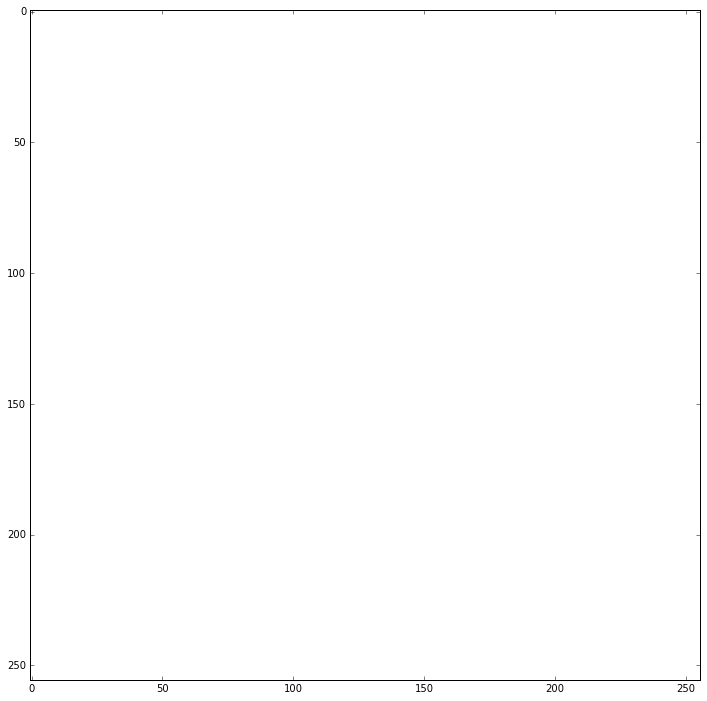

In [44]:
pylab.figure(figsize=(12, 12))
pylab.imshow(np.abs(X2d - out2d), cmap=pylab.cm.gray_r, vmin=0, vmax=1)